## Business Questions

1. What is the distribution of listings based on the number of guests they can accommodate?
2. How does the average price vary for listings that accommodate different numbers of guests?
3. How do the prices depends on location?
4. What is the price correlation to other listing features?


## Add needed libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.ticker import FuncFormatter, MultipleLocator

## Load and Inspect Data

In the next cell, we will load the dataset from a CSV file and inspect the columns to understand the structure of the data.


In [3]:
listing_df = pd.read_csv('data/listings_all_processed.csv')
listing_df.columns

Index(['id', 'name', 'description', 'neighborhood_overview', 'picture_url',
       'host_id', 'host_name', 'host_since', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'latitude', 'longitude',
       'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'accommodates_grouped', 'distance_from_center', 'distance_category'],
      dtype='object')

## Analyze Accommodates Grouped

In the next cell, we will analyze the distribution of listings based on the `accommodates_grouped` column. We will calculate the value counts, sort them by index, and visualize the distribution using a bar chart.


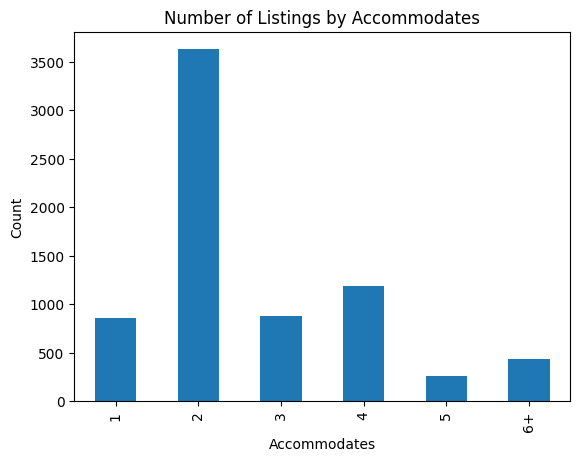

In [4]:
# Get the value counts and sort by index
accommodates_counts = listing_df['accommodates_grouped'].value_counts().sort_index()

# Plot the bar chart
accommodates_counts.plot(kind='bar')
plt.xlabel('Accommodates')
plt.ylabel('Count')
plt.title('Number of Listings by Accommodates')
plt.show()

## Visualize Accommodates Percentage

In the next cell, we will calculate the percentage of listings for each `accommodates_grouped` category and visualize the distribution using a pie chart.


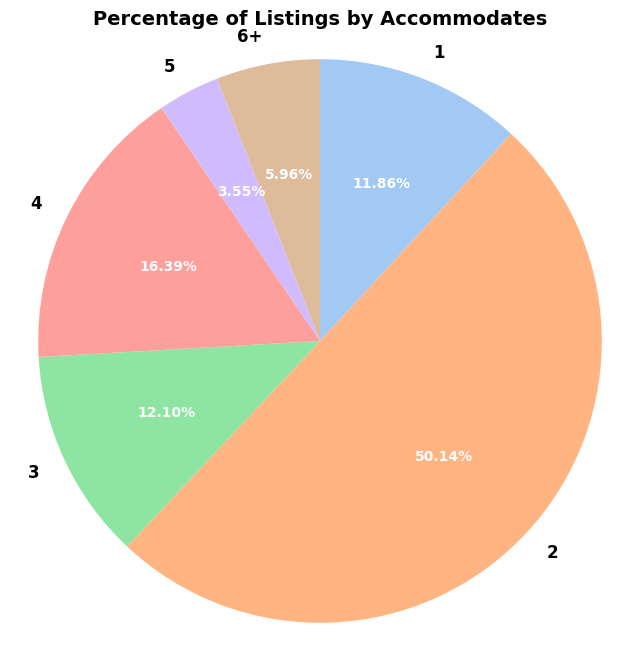

In [5]:
# Calculate the percentage
accommodates_percentage = (accommodates_counts / accommodates_counts.sum()) * 100

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(accommodates_percentage, 
                                  labels=accommodates_percentage.index, 
                                  autopct='%1.2f%%', 
                                  startangle=90, 
                                  counterclock=False, 
                                  colors=sns.color_palette("pastel"))

# Enhance the appearance
plt.setp(autotexts, size=10, weight="bold", color="white")
plt.setp(texts, size=12, weight="bold")

# Add a title
plt.title('Percentage of Listings by Accommodates', fontsize=14, weight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

plt.show()

## Analyze Price Distribution by Accommodates Grouped

In the next cell, we will group the listings by the `accommodates_grouped` column and calculate the average price for each group. We will then visualize the distribution using a bar chart and annotate the bars with the average price values.


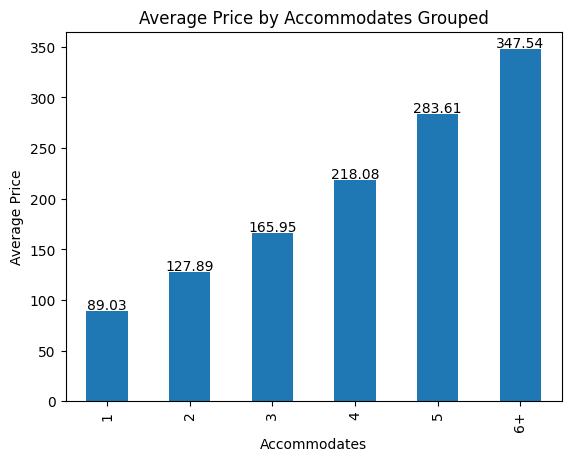

In [6]:
# Group by accommodates_grouped and calculate the average price
price_distribution = listing_df.groupby('accommodates_grouped')['price'].mean().sort_index()

# Plot the bar chart
ax = price_distribution.plot(kind='bar')
plt.xlabel('Accommodates')
plt.ylabel('Average Price')
plt.title('Average Price by Accommodates Grouped')

# Annotate the bars with the average price values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()-8), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

## Calculate Percentage Difference in Average Price

In the next cell, we will calculate the percentage difference in average price for each `accommodates_grouped` category compared to the average price for the `accommodates_grouped` value of 2. We will visualize the percentage differences using a bar chart and annotate the bars with the percentage difference values.


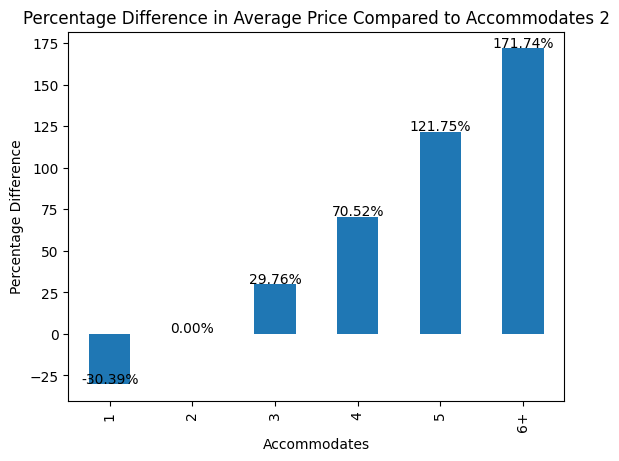

In [7]:
# Calculate the mean price for accommodates_grouped value of 2
mean_price_2 = price_distribution['2']

# Calculate the percentage difference for each category compared to the mean price for 2
percentage_difference = ((price_distribution - mean_price_2) / mean_price_2) * 100

# Plot the bar chart
ax = percentage_difference.plot(kind='bar')
plt.xlabel('Accommodates')
plt.ylabel('Percentage Difference')
plt.title('Percentage Difference in Average Price Compared to Accommodates 2')

# Annotate the bars with the percentage difference values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()-5), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

## Compare Prices for Accommodates 5 and 6+

In the next cell, we will filter the listings to include only those that accommodate exactly 5 guests and those that accommodate 5 or more guests. We will then calculate and print the mean and median prices for these groups to compare the price differences.


In [11]:
# Filter the DataFrame for accommodates values of 5 and 5+
accommodates_5 = listing_df[listing_df['accommodates'] == 5]
accommodates_6_plus = listing_df[listing_df['accommodates_grouped'] == '6+']

# Calculate the mean and median prices for these groups
mean_price_5 = accommodates_5['price'].mean()
median_price_5 = accommodates_5['price'].median()

mean_price_6_plus = accommodates_6_plus['price'].mean()
median_price_6_plus = accommodates_6_plus['price'].median()

# Print the results
print(f"Mean price for accommodates 5: {mean_price_5:.2f}")
print(f"Median price for accommodates 5: {median_price_5:.2f}")
print(f"Mean price for accommodates 6+: {mean_price_6_plus:.2f}")
print(f"Median price for accommodates 6+: {median_price_6_plus:.2f}")

Mean price for accommodates 5: 283.61
Median price for accommodates 5: 219.00
Mean price for accommodates 6+: 347.54
Median price for accommodates 6+: 296.00


## histplot

In the next cell, we will filter the listings to include only those that accommodate exactly 5 guests and those that accommodate 5 or more guests. We will then calculate and print the mean and median prices for these groups to compare the price differences.


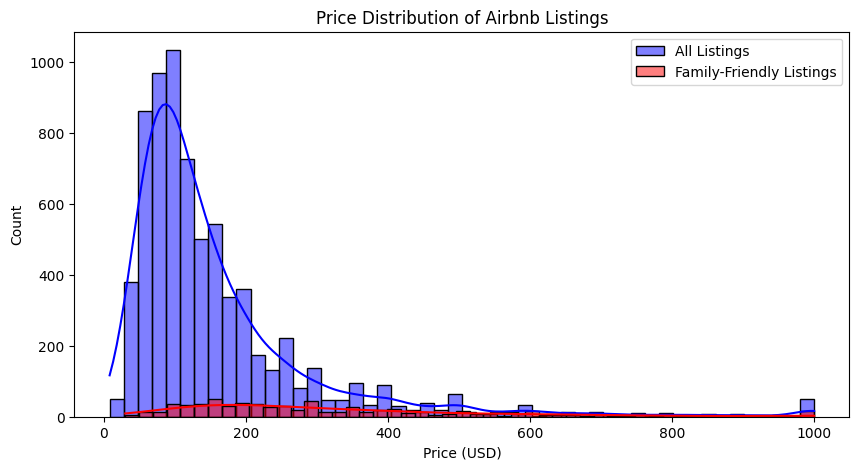

In [10]:
# Plot price distribution
plt.figure(figsize=(10, 5))
sns.histplot(listing_df['price'], bins=50, kde=True, color='blue', label='All Listings')
sns.histplot(listing_df[listing_df['accommodates'] >=5]['price'], bins=50, kde=True, color='red', label='Family-Friendly Listings')
plt.legend()
plt.title("Price Distribution of Airbnb Listings")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.show()


## Price Distribution for 2, 3, 4, and 5-Person Listings


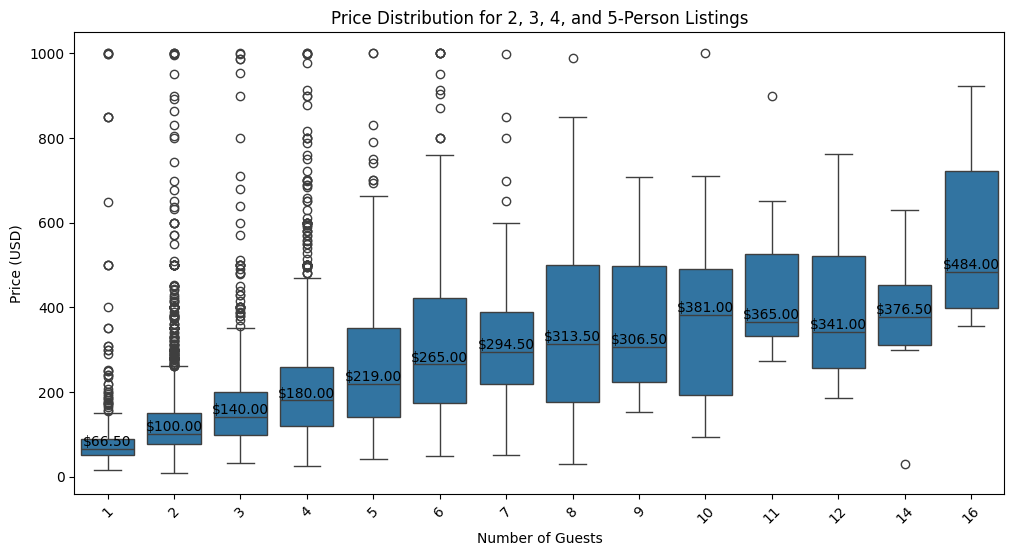

In [8]:
# Filter relevant property types
selected_property_types = [
    "Entire rental unit",
    "Entire condo",
    "Entire home",
    "Private room in rental unit",
    "Entire serviced apartment",
    "Room in hotel"
]

filtered_df = listing_df[listing_df['property_type'].isin(selected_property_types)]

# Boxplot comparing price distribution for 2, 3, 4, and 5-person listings
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='accommodates', y='price', data=filtered_df)
plt.xticks(rotation=45)
plt.title("Price Distribution for 2, 3, 4, and 5-Person Listings")
plt.xlabel("Number of Guests")
plt.ylabel("Price (USD)")

# Calculate and annotate the median price and median cost per 1 person for each group
medians = filtered_df.groupby('accommodates')['price'].median()
for i in range(len(medians)):
    median_price = medians.iloc[i]
    accommodates = medians.index[i]
    median_cost_per_person = median_price / accommodates
    ax.text(i, median_price, f"${median_price:.2f}", 
            ha='center', va='bottom') 

plt.show()

## Median Cost per Person for Different Accommodates Groups

C:\Users\A93074843\AppData\Local\Temp\ipykernel_34352\1735578424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cost_per_person'] = filtered_df['price'] / filtered_df['accommodates']


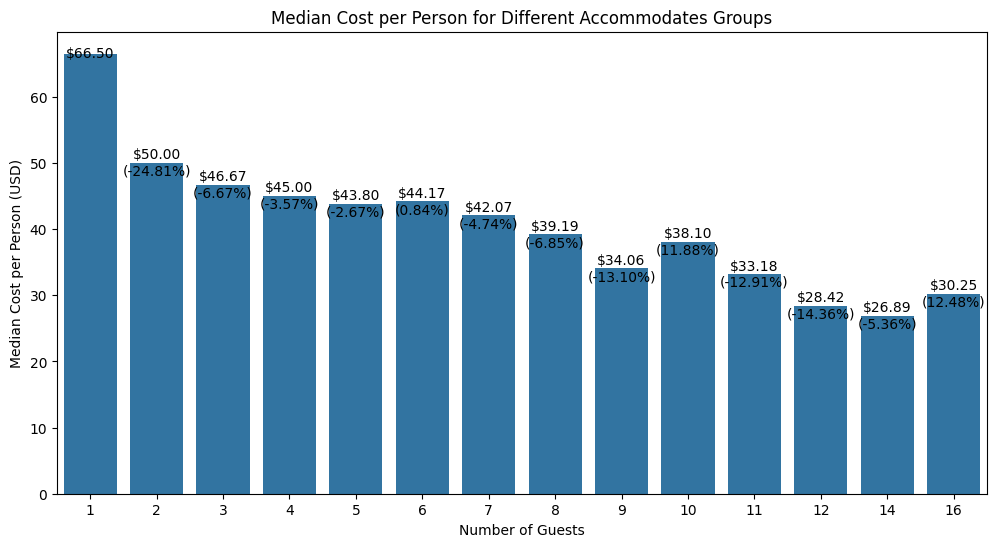

In [9]:

# Calculate the median cost per person for each accommodates group
filtered_df['cost_per_person'] = filtered_df['price'] / filtered_df['accommodates']
median_cost_per_person = filtered_df.groupby('accommodates')['cost_per_person'].median()

# Calculate the percentage difference between consecutive bars
percentage_difference = median_cost_per_person.pct_change() * 100

# Plot the median cost per person
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=median_cost_per_person.index, y=median_cost_per_person.values)
plt.title("Median Cost per Person for Different Accommodates Groups")
plt.xlabel("Number of Guests")
plt.ylabel("Median Cost per Person (USD)")

# Annotate the bars with the median cost per person values and percentage difference
for i, (value, pct_diff) in enumerate(zip(median_cost_per_person.values, percentage_difference.values)):
    if i == 0:
        ax.text(i, value, f"${value:.2f}", ha='center', va='center')
    else:
        ax.text(i, value, f"${value:.2f}\n({pct_diff:.2f}%)", ha='center', va='center')

plt.show()

## Proportion of Superhosts within Each Accommodates Category

C:\Users\A93074843\AppData\Local\Temp\ipykernel_34352\612545227.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=proportion_superhosts.index, y=proportion_superhosts.values, palette="viridis")


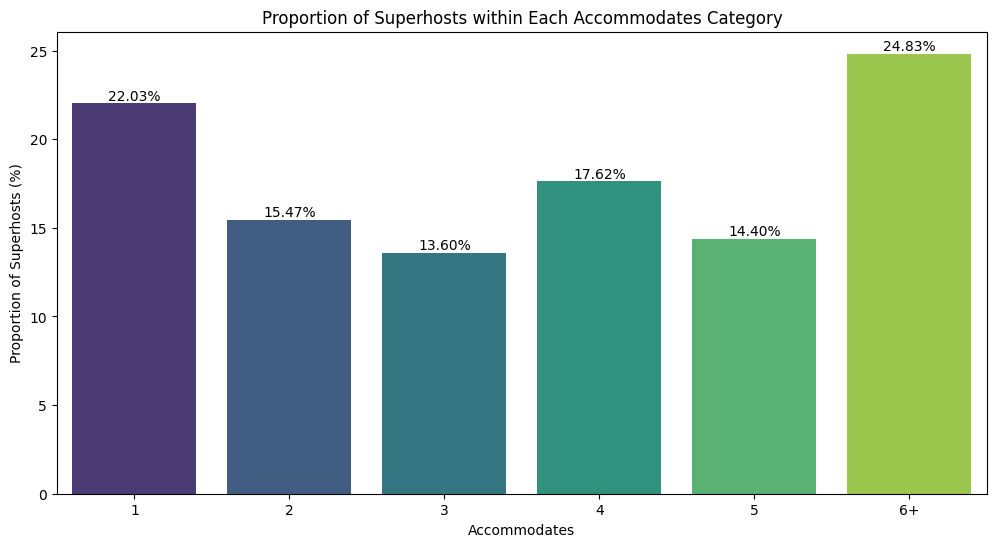

In [10]:
# Filter the DataFrame to include only superhosts
superhosts_df = listing_df[listing_df['host_is_superhost'] == 't']

# Group by accommodates_grouped and count the number of superhosts in each category
superhosts_count = superhosts_df['accommodates_grouped'].value_counts().sort_index()

# Group the original DataFrame by accommodates_grouped and count the total number of listings in each category
total_count = listing_df['accommodates_grouped'].value_counts().sort_index()

# Calculate the proportion of superhosts within each category
proportion_superhosts = (superhosts_count / total_count) * 100

# Plot the proportion of superhosts within each category
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=proportion_superhosts.index, y=proportion_superhosts.values, palette="viridis")
plt.title("Proportion of Superhosts within Each Accommodates Category")
plt.xlabel("Accommodates")
plt.ylabel("Proportion of Superhosts (%)")

# Annotate the bars with the proportion values
for i, value in enumerate(proportion_superhosts.values):
    ax.text(i, value, f"{value:.2f}%", ha='center', va='bottom')

plt.show()

## Average Reviews per Month for Each Accommodates Category

C:\Users\A93074843\AppData\Local\Temp\ipykernel_34352\2997514231.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_reviews.index, y=total_reviews.values, palette="viridis")


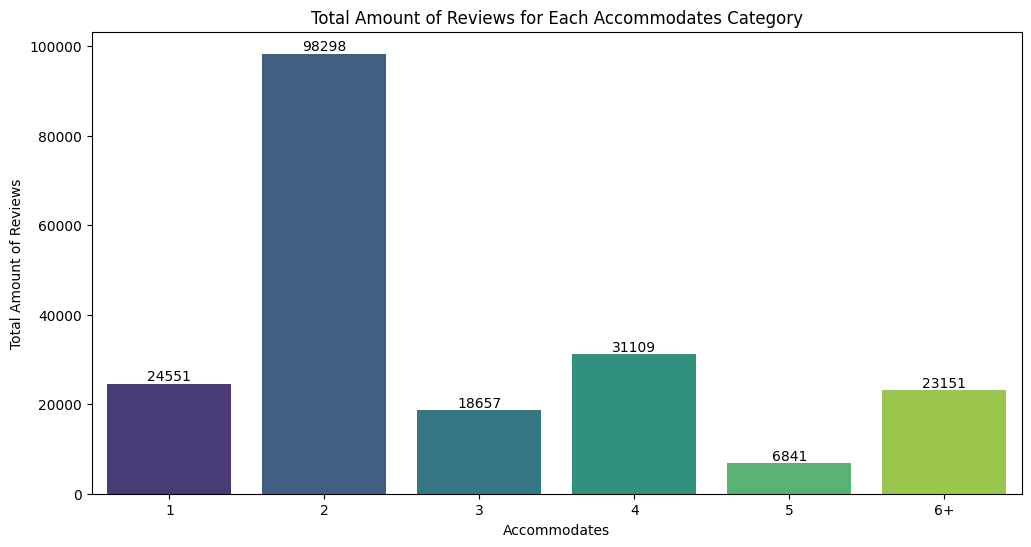

C:\Users\A93074843\AppData\Local\Temp\ipykernel_34352\2997514231.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_reviews_per_month.index, y=average_reviews_per_month.values, palette="viridis")


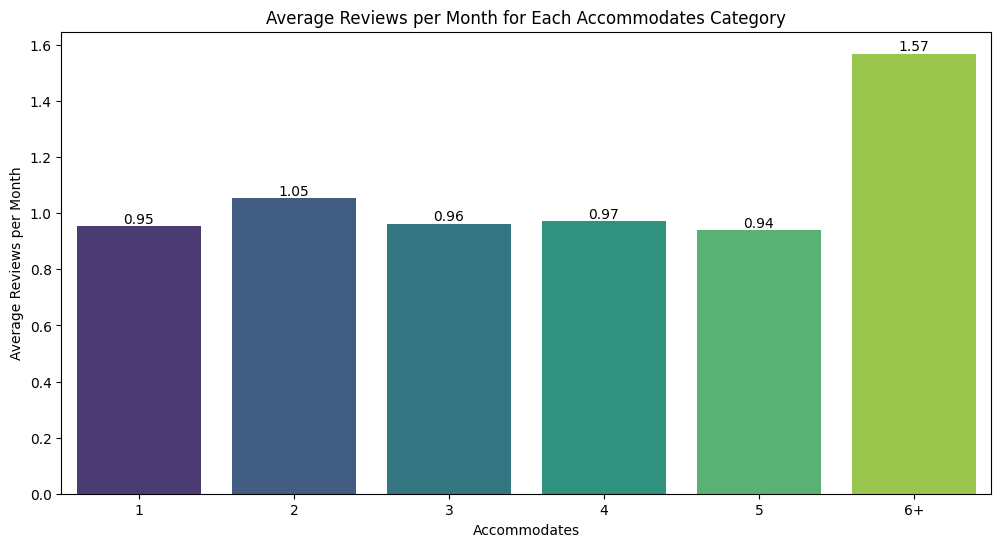

C:\Users\A93074843\AppData\Local\Temp\ipykernel_34352\2997514231.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='accommodates_grouped', y='review_scores_rating', data=listing_df, palette="viridis",order=category_order)


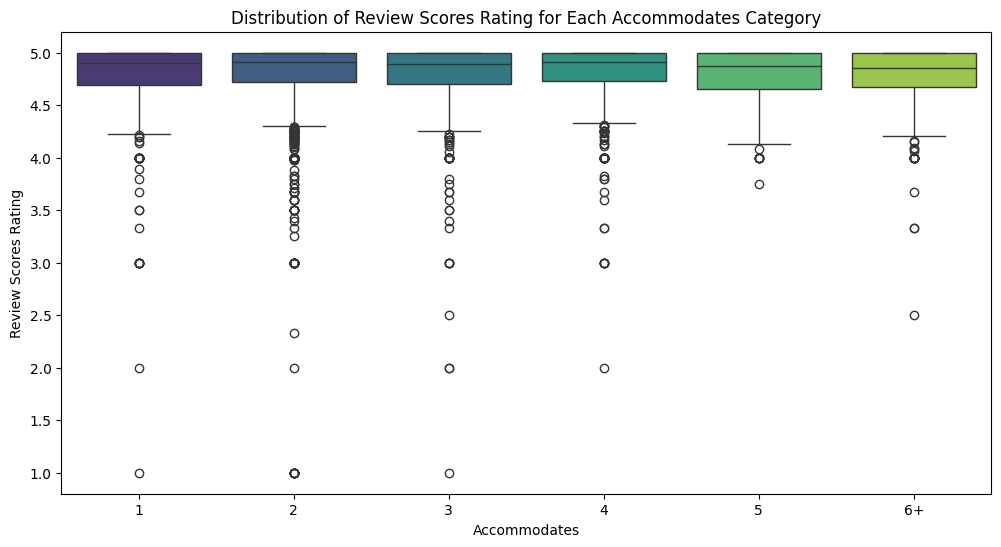

In [11]:
# Group by accommodates_grouped and calculate the total amount of reviews
total_reviews = listing_df.groupby('accommodates_grouped')['number_of_reviews'].sum()

# Plot the total amount of reviews
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=total_reviews.index, y=total_reviews.values, palette="viridis")
plt.title("Total Amount of Reviews for Each Accommodates Category")
plt.xlabel("Accommodates")
plt.ylabel("Total Amount of Reviews")

# Annotate the bars with the total amount of reviews
for i, value in enumerate(total_reviews.values):
    ax.text(i, value, f"{value}", ha='center', va='bottom')

plt.show()


# Group by accommodates_grouped and calculate the average reviews_per_month
average_reviews_per_month = listing_df.groupby('accommodates_grouped')['reviews_per_month'].mean()

# Plot the average reviews_per_month
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=average_reviews_per_month.index, y=average_reviews_per_month.values, palette="viridis")
plt.title("Average Reviews per Month for Each Accommodates Category")
plt.xlabel("Accommodates")
plt.ylabel("Average Reviews per Month")

# Annotate the bars with the average reviews_per_month
for i, value in enumerate(average_reviews_per_month.values):
    ax.text(i, value, f"{value:.2f}", ha='center', va='bottom')

plt.show()



# Define the order of the categories
category_order = ['1', '2', '3', '4', '5', '6+']

# Plot the distribution of review_scores_rating for each accommodates_grouped category
plt.figure(figsize=(12, 6))
sns.boxplot(x='accommodates_grouped', y='review_scores_rating', data=listing_df, palette="viridis",order=category_order)
plt.title("Distribution of Review Scores Rating for Each Accommodates Category")
plt.xlabel("Accommodates")
plt.ylabel("Review Scores Rating")
plt.show()

## Distribution of Listings by Distance from Center for Each Accommodates Category

<Figure size 1400x800 with 0 Axes>

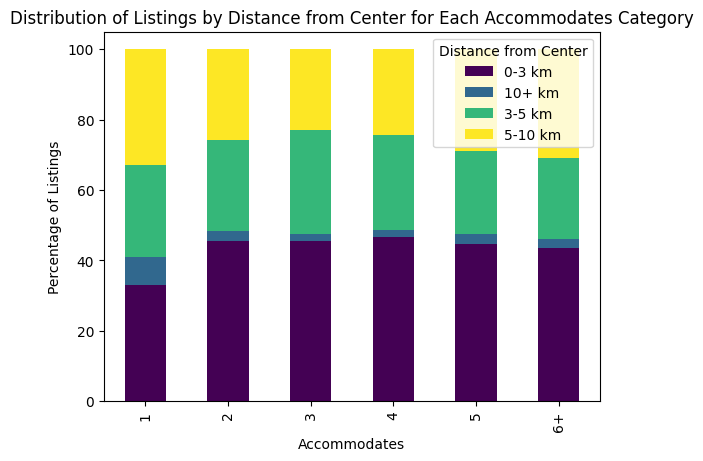

In [12]:
# Calculate the percentage of listings in each distance range for each accommodates_grouped category
distance_distribution = listing_df.groupby(['accommodates_grouped', 'distance_category']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the results
plt.figure(figsize=(14, 8))
distance_distribution.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Distribution of Listings by Distance from Center for Each Accommodates Category")
plt.xlabel("Accommodates")
plt.ylabel("Percentage of Listings")
plt.legend(title="Distance from Center")
plt.show()

## Price Distribution by Accommodates Grouped and Distance from Center

C:\Users\A93074843\AppData\Local\Temp\ipykernel_34352\1628677316.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = listing_df.groupby(['distance_category', 'accommodates_grouped'])['price'].median().reset_index()


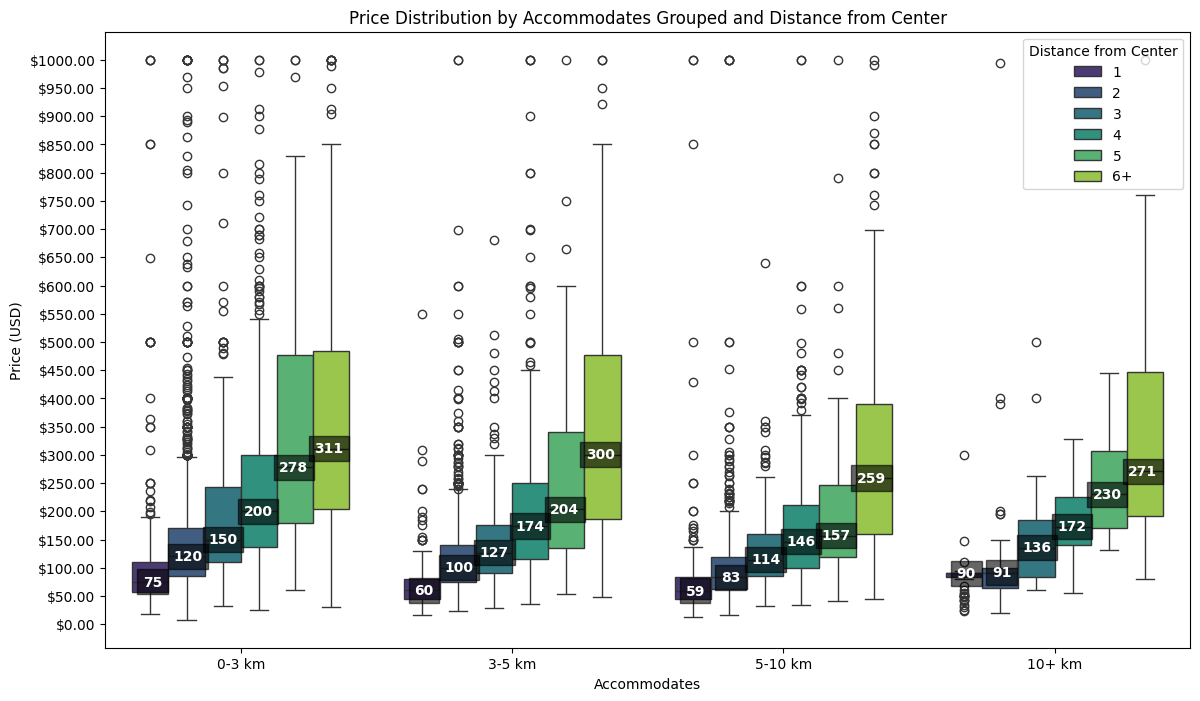

In [56]:
# Define the correct order of the accommodates_grouped categories
category_order = ['1', '2', '3', '4', '5', '6+']
listing_df['accommodates_grouped'] = pd.Categorical(listing_df['accommodates_grouped'], categories=category_order, ordered=True)

distance_order = ['0-3 km', '3-5 km', '5-10 km', '10+ km']
listing_df['distance_category'] = pd.Categorical(listing_df['distance_category'], categories=distance_order, ordered=True)

# Function to format the y-axis labels with more digits
def price_formatter(x, pos):
    return f'${x:.2f}'

# Plot the distribution of prices for each combination of accommodates_grouped and distance_category
plt.figure(figsize=(14, 8))
ax= sns.boxplot(x='distance_category', y='price', hue='accommodates_grouped', data=listing_df, palette="viridis")
plt.title("Price Distribution by Accommodates Grouped and Distance from Center")
plt.xlabel("Accommodates")
plt.ylabel("Price (USD)")

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(price_formatter))
# Set the y-axis ticks to be more granular
ax.yaxis.set_major_locator(MultipleLocator(50))

# Annotate the median values
medians = listing_df.groupby(['distance_category', 'accommodates_grouped'])['price'].median().reset_index()
for line in range(medians.shape[0]):
    distance_category = medians['distance_category'][line]
    accommodates_grouped = medians['accommodates_grouped'][line]
    median_val = medians['price'][line]
    x = distance_order.index(distance_category) + (category_order.index(accommodates_grouped) - len(category_order)/2.4) * 0.13
    ax.text(x, median_val, f'{median_val:.0f}', ha='center', va='center', fontweight='bold', color='white', bbox=dict(facecolor='black', alpha=0.6))


plt.legend(title="Distance from Center")
plt.show()

## Another view for Price Distribution by Accommodates Grouped and Distance from Center 

C:\Users\A93074843\AppData\Local\Temp\ipykernel_34352\445211608.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = listing_df.groupby(['accommodates_grouped', 'distance_category'])['price'].median().reset_index()


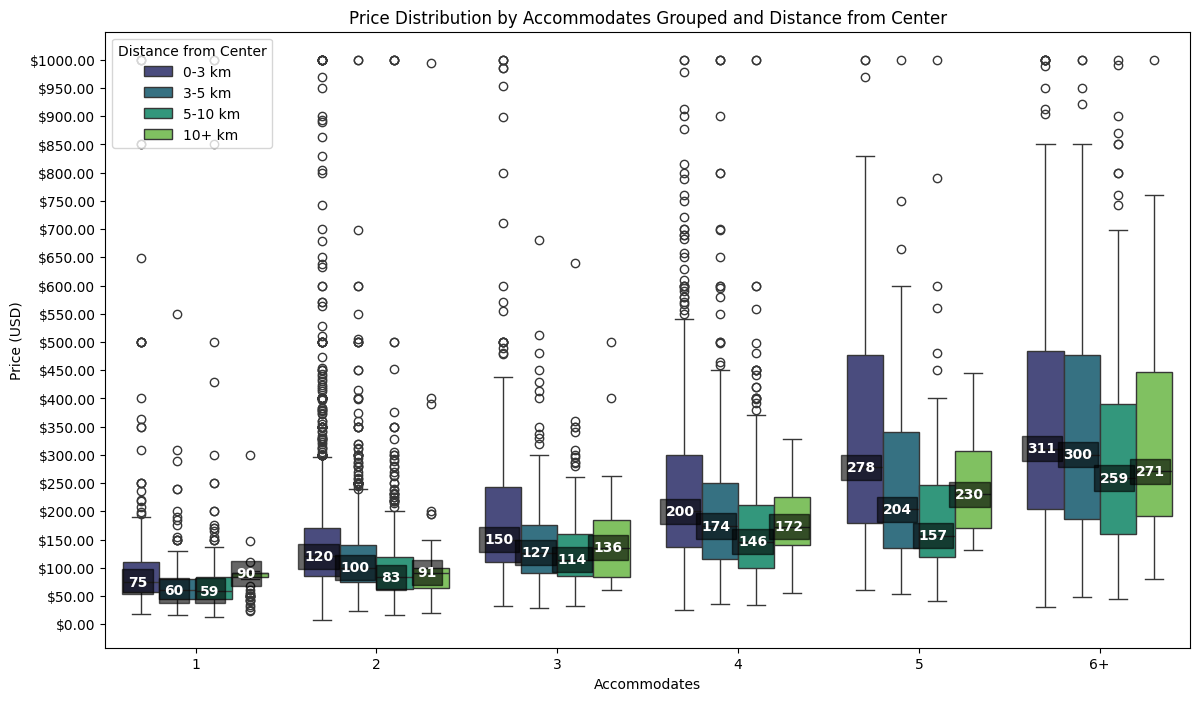

In [54]:
# Define the correct order of the accommodates_grouped categories
category_order = ['1', '2', '3', '4', '5', '6+']
listing_df['accommodates_grouped'] = pd.Categorical(listing_df['accommodates_grouped'], categories=category_order, ordered=True)

distance_order = ['0-3 km', '3-5 km', '5-10 km', '10+ km']
listing_df['distance_category'] = pd.Categorical(listing_df['distance_category'], categories=distance_order, ordered=True)


# Function to format the y-axis labels with more digits
def price_formatter(x, pos):
    return f'${x:.2f}'

# Plot the distribution of prices for each combination of accommodates_grouped and distance_category
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='accommodates_grouped', y='price', hue='distance_category', data=listing_df, palette="viridis")
plt.title("Price Distribution by Accommodates Grouped and Distance from Center")
plt.xlabel("Accommodates")
plt.ylabel("Price (USD)")

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(price_formatter))

# Set the y-axis ticks to be more granular
ax.yaxis.set_major_locator(MultipleLocator(50))

# Annotate the median values
medians = listing_df.groupby(['accommodates_grouped', 'distance_category'])['price'].median().reset_index()
for line in range(medians.shape[0]):
    accommodates_grouped = medians['accommodates_grouped'][line]
    distance_category = medians['distance_category'][line]
    median_val = medians['price'][line]
    x = category_order.index(accommodates_grouped) + (distance_order.index(distance_category) - len(distance_order)/2.5) * 0.2
    ax.text(x, median_val, f'{median_val:.0f}', ha='center', va='center', fontweight='bold', color='white', bbox=dict(facecolor='black', alpha=0.6))
    
plt.legend(title="Distance from Center")
plt.show()

## Heatmap of possible price correlation

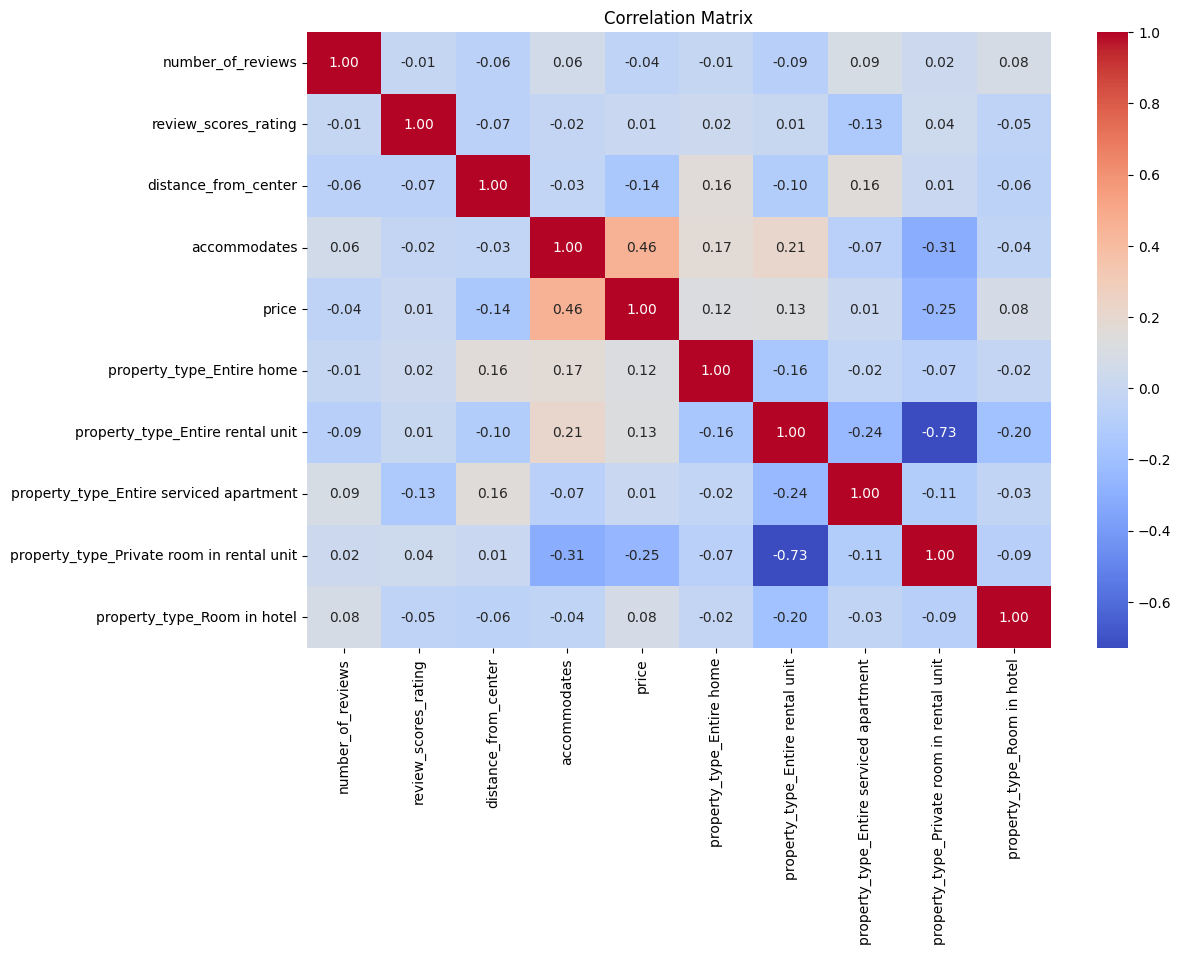

In [7]:
# Filter relevant property types
selected_property_types = [
    "Entire rental unit",
    "Entire condo",
    "Entire home",
    "Private room in rental unit",
    "Entire serviced apartment",
    "Room in hotel"
]

filtered_df = listing_df[listing_df['property_type'].isin(selected_property_types)]

# Select the relevant columns
columns_of_interest = ['number_of_reviews', 'review_scores_rating', 'distance_from_center', 'accommodates', 'property_type', 'price']
df = filtered_df[columns_of_interest]

# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['property_type'], drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()